In [2]:

import pandas as pd
import numpy as np
import re
import lxml
import seaborn as sns
import matplotlib as plt

%matplotlib inline

In [4]:
df = pd.read_csv('mergedData.csv')

In [22]:
df.columns

Index(['Title', 'Year', 'Genre', 'Rating', 'Score', 'Director', 'Stars',
       'Gross', 'Popularity', 'Vote_Count', 'Id', 'Original_Language',
       'Original_Title', 'Genre_Ids', 'Vote_Average', 'Release_Date',
       'Revenue', 'Budget', 'Genre_y', 'Log Gross'],
      dtype='object')

TypeError: 'Index' object is not callable

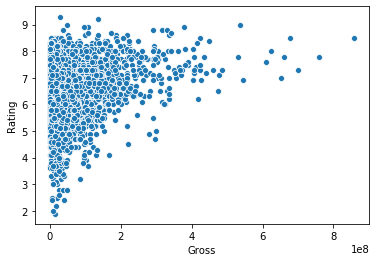

In [6]:
gross = df['Gross']
df['Log Gross']= np.log(df['Gross'])
rating = df['Rating']
ax = sns.scatterplot(x = 'Gross',y = 'Rating', data = df)

/Users/carymosley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/carymosley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


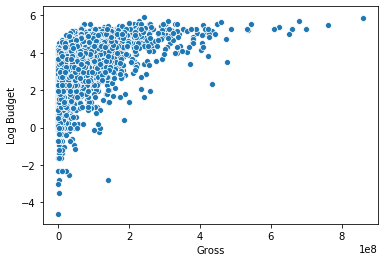

In [38]:

df2 = df.loc[df['Budget'] != 0]
gross = df2['Gross']
df2['Log Gross']= np.log(df2['Gross'])
df2['Log Budget']= np.log(df2['Budget'])
rating = df2['Rating']
budged = df2['Budget']
ax = sns.scatterplot(x = 'Gross',y = 'Log Budget', data = df2)

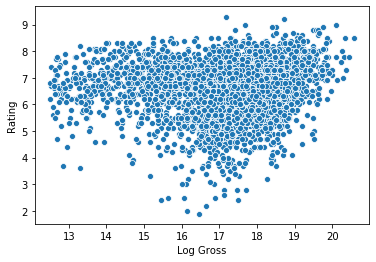

In [7]:
ax = sns.scatterplot(x = 'Log Gross',y = 'Rating', data = df)

In [23]:
score = df[['Director','Gross','Score']].groupby('Score').mean().sort_values('Gross', ascending = False)

rating = df[['Director','Gross','Rating']].groupby('Rating').mean().sort_values('Gross', ascending = False)

genres = df[['Director','Gross','Genre']].groupby('Genre').mean().sort_values('Gross', ascending = False)



In [9]:
score['Score']=score.index
rating['Rating']=rating.index
genres['Genres']=genres.index
rating['Log Gross']=np.log(rating['Gross'])
score.reset_index(drop = True, inplace = True)
rating.reset_index(drop = True, inplace = True)
genres.reset_index(drop = True, inplace = True)

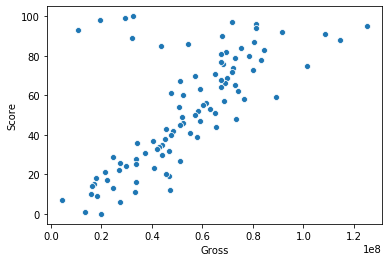

In [10]:
ax = sns.scatterplot(x = 'Gross',y = 'Score', data = score)


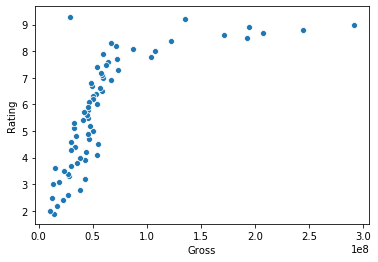

In [11]:
ax = sns.scatterplot(x = 'Gross',y = 'Rating', data = rating)


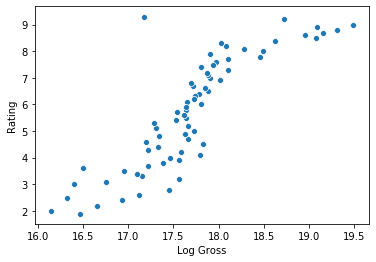

In [12]:
ax = sns.scatterplot(x = 'Log Gross',y = 'Rating', data = rating)



In [13]:
rating.corr()


,Gross,Rating,Log Gross
Gross,1.000000,0.703614,0.895908
Rating,0.703614,1.000000,0.847047
Log Gross,0.895908,0.847047,1.000000


In [14]:
genres['Genres'] = genres['Genres'].apply(lambda x:x.split())



In [15]:

genres['Genres1'] = genres['Genres'].apply(lambda x:x[0])


In [16]:
def genres_Split(list):
    try:
        x = list[1]
    except:
        x = list[0]
    return x
def genres_Split2(list):
    try:
        x = list[2]
    except:
        x = list[0]
    return x


In [17]:
genres['Genres2'] = genres['Genres'].apply(lambda x:genres_Split(x))
genres['Genres3'] = genres['Genres'].apply(lambda x:genres_Split2(x))



In [19]:
df['Stars']

0       ['Kang-ho Song', 'Sun-kyun Lee', 'Yeo-jeong Jo...
1       ['Elisabeth Moss', 'Oliver Jackson-Cohen', 'Ha...
2       ['Daniel Craig', 'Chris Evans', 'Ana de Armas'...
3       ['Ben Schwartz', 'James Marsden', 'Jim Carrey'...
4       ['Roman Griffin Davis', 'Thomasin McKenzie', '...
                              ...                        
3995    ['Jean Reno', 'Christina Applegate', 'Christia...
3996    ['Laura Linney', 'Philip Seymour Hoffman', 'Ph...
3997    ['Morris Chestnut', 'Regina Hall', 'Romany Mal...
3998    ['Barbra Streisand', 'Seth Rogen', 'Julene Ren...
3999    ['Diane Keaton', 'Geraldine Page', 'Kristin Gr...
Name: Stars, Length: 4000, dtype: object